# Spotify Analysis
## This is my portfolio project for the analysis of a dataset from https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024
In this project i will visualise the variables in this dataset to perform EDA my observations will be
1. Avg streams in each platform
2. Which playlist has the most song reach
3. Do people listen to explicit songs more or non explicit
all of this will be answered

In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

In [152]:
songs = pd.read_csv("spotify.csv",encoding = "latin1")
print(songs.head())
print(songs.dtypes)

                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
0 

Now i will check if their are any null values in the dataset

In [70]:
print(songs.isnull().sum())

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

So as expected there is some variables which do have incomplete data some more incomplete than the others

so lets calculate the percentage of the variables which have null data i will start with the spotify streams

In [74]:
spotify_streams_missing_percentage = songs["Spotify Streams"].isnull().sum()/len(songs["Spotify Streams"])
print(spotify_streams_missing_percentage)

0.024565217391304347


so from the calculation we can see that the streams have a 0.024 percent of missing data

lets visualize this missing data into a heatmap

In [80]:
!pip install seaborn


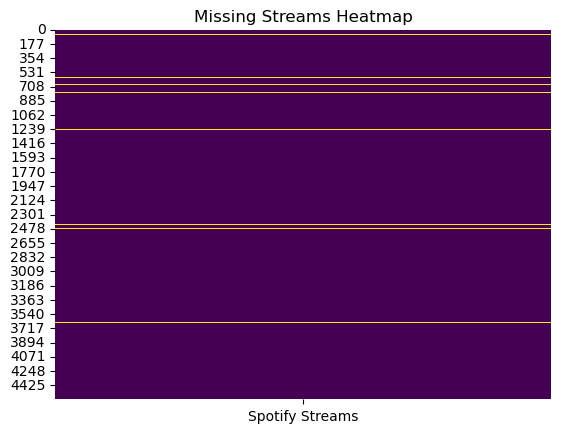

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(songs["Spotify Streams"].isnull().to_frame(),cbar=False, cmap='viridis')
plt.title("Missing Streams Heatmap")
plt.show()

This is the heatmap that we have produced

Lets move on to youtube views

In [100]:
youtube_views_missing_percentage = songs["YouTube Views"].isnull().sum()/len(songs["YouTube Views"])
print(youtube_views_missing_percentage)

0.06695652173913043


ok so in the youtube views variable we can see that 0.0669 or if we round it off 0.067 percent of the data is missing
lets now visualize the pattern of this missing data by another heatmap

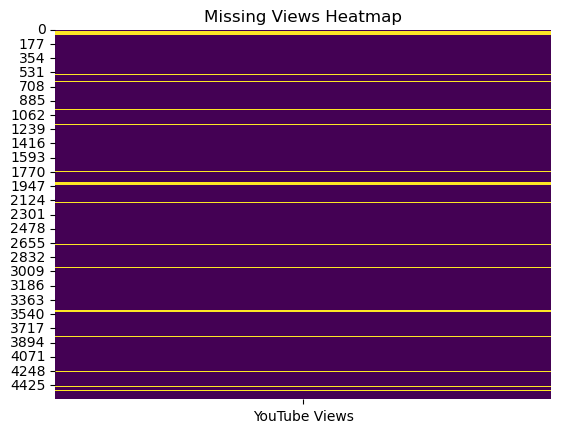

In [103]:
sns.heatmap(songs["YouTube Views"].isnull().to_frame(),cbar=False, cmap='viridis')
plt.title("Missing Views Heatmap")
plt.show()

## Ok so lets move on to decriptive stats,comparisions and associations between variables 

The first comparision between variables will be between Youtube views and spotify streams first we will change their datatypes so that we can apply numeric functions on them

In [170]:
# Replace NaNs with "0" in place
songs["Spotify Streams"].fillna("0", inplace=True)
spotify_streams = songs["Spotify Streams"].str.replace(",","").astype("int64")
songs["YouTube Views"].fillna("0",inplace=True)
youtube_views = songs["YouTube Views"].str.replace(",","").astype("int64")

In [176]:
#lets calculate the differences in their mean and median
spotify_mean = spotify_streams.mean()
youtube_mean = youtube_views.mean()
mean_diff = spotify_mean - youtube_mean
print(mean_diff)

60570287.06130439


as we can see this is the difference in the streams on spotify and youtube this large or is it to find out we must visualize this using a scatter plot

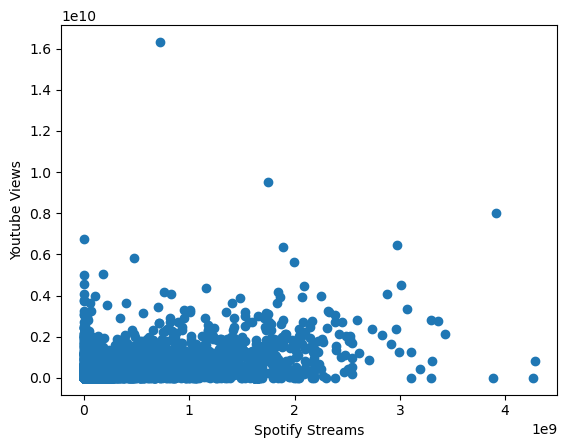

In [179]:
plt.scatter(x = spotify_streams,y = youtube_views)
plt.xlabel("Spotify Streams")
plt.ylabel("Youtube Views")
plt.show()

so we can now see the way the values have been distributed throughout the 2 platforms there is no association between them this mean people who listened to the music on spotify didnt not listen to it on youtube and vice versa so there is no correlation we can further calculate this using pearsonr corelation function

In [186]:
from scipy.stats import pearsonr
correlation,p = pearsonr(spotify_streams,youtube_views)
print(correlation)

0.4173069573084946


With a correlation coefficient of 0.417, there is a weak positive association between Spotify streams and YouTube views. This indicates that there is some overlap in the popularity of songs across these two platforms, but the relationship is not strong. Therefore, while songs that perform well on one platform might see some level of success on the other, the correlation is not strong enough to suggest that a song's popularity on Spotify will reliably predict its popularity on YouTube, and vice versa. This suggests that the platforms have partially overlapping but still distinct audiences

## Ok so now lets see if a songs popularity is due to its views on tiktok 
this will find out if this statement is true and see if there is a relation between tiktok views and spotify streams

In [191]:
songs["TikTok Views"].fillna("0",inplace = True)
TikTok_Views = songs["TikTok Views"].str.replace(",","").astype("int64")
TikTok_mean = TikTok_Views.mean()
print(TikTok_mean)

913528269.8713044


/var/folders/qt/3h7qgr6x4lncr6flcpjdt25h0000gn/T/ipykernel_47042/1918056544.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  songs["TikTok Views"].fillna("0",inplace = True)


In [193]:
diff_in_mean = spotify_mean - TikTok_mean
print(diff_in_mean)

-477131121.7702174


This diff in mean suggests that more people have heard the songs more frequently on tiktok then on spotify


lets visulize this into a scatter plot


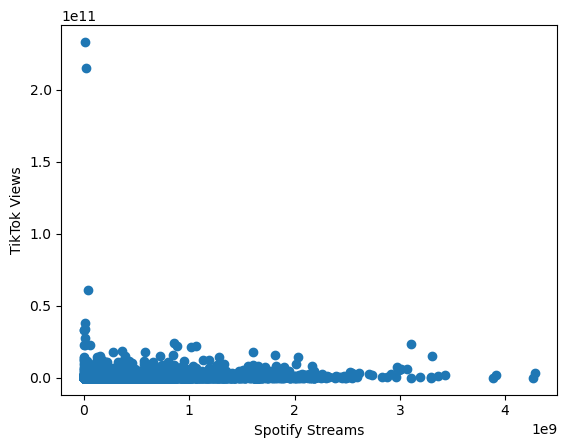

In [203]:
plt.scatter(x = spotify_streams,y = TikTok_Views)
plt.xlabel("Spotify Streams")
plt.ylabel("TikTok Views")
plt.show()

no linear relationship in this plot means that the popularity of the song on 1 platform doesnt mean that it will do well on the other
we can gather more data by the pearsonr correlation function to see this and confirm it to some extent


In [208]:
corr,p = pearsonr(TikTok_Views,spotify_streams)
print(corr)

0.044029488370616224


so as we can see this mean that it is a correlation close to 0 so this mean that the above statement is true

lets also plot their kda histograms


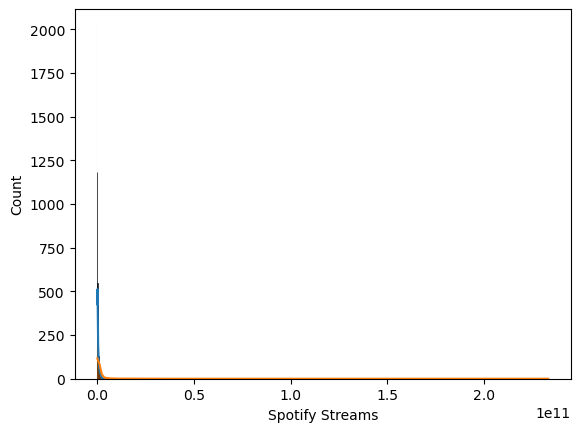

In [215]:
sns.histplot(spotify_streams, kde=True)
sns.histplot(TikTok_Views, kde=True)
plt.show()
plt.close()


## Lets now compare spotify with its biggest competitor soundcloud
1. lets find the diff in mean and median
2. side by side boxplot to viualize them too

In [218]:
songs["Soundcloud Streams"].fillna("0",inplace = True)
soundcloud_streams = songs["Soundcloud Streams"].str.replace(",","").astype("int64")
soundcloud_mean = soundcloud_streams.mean()
diff_in_mean_sound_and_spotify = spotify_mean - soundcloud_mean
print(diff_in_mean_sound_and_spotify)

432307501.1480435


/var/folders/qt/3h7qgr6x4lncr6flcpjdt25h0000gn/T/ipykernel_47042/260508096.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  songs["Soundcloud Streams"].fillna("0",inplace = True)


so this diff in mean indicates thats more people stream on spotify rather then on soundcloud further more this could be due to the fact that spotify respects the piracy laws whereas soundcloud doesnt and has pirated songs on its platform so
1. people heard their songs on spotify due to ethical reasons
2. people couldnt find their song on soundcloud
   

lets visualize this into a side by side boxplot to look into further

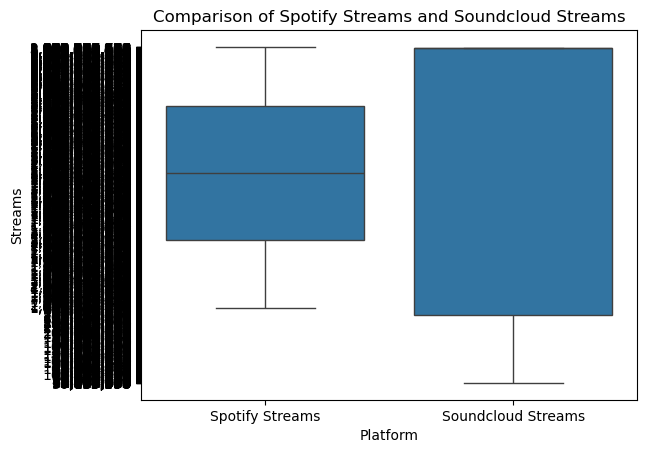

In [223]:
melted_songs = pd.melt(songs[['Spotify Streams', 'Soundcloud Streams']], 
                       var_name='Platform', value_name='Streams')


sns.boxplot(x='Platform', y='Streams', data=melted_songs)
plt.title('Comparison of Spotify Streams and Soundcloud Streams')
plt.show()
plt.close()

this is a visual representation of their streams 

this is a scatter plot


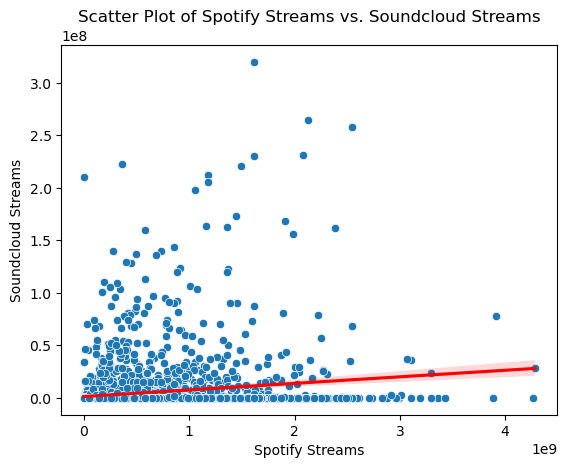

In [231]:
sns.scatterplot(x=spotify_streams, y=soundcloud_streams, data=songs)
sns.regplot(x= spotify_streams, y= soundcloud_streams, data=songs, scatter=False, color='red')
plt.title('Scatter Plot of Spotify Streams vs. Soundcloud Streams')
plt.show()

## Now lets turn our attention to playlist reach between youtube and spotify

In [235]:
songs["Spotify Playlist Reach"].fillna("0",inplace = True)
songs["YouTube Playlist Reach"].fillna("0",inplace = True)
spotify_reach = songs["Spotify Playlist Reach"].str.replace(",","").astype("int64")
youtube_reach = songs["YouTube Playlist Reach"].str.replace(",","").astype("int64")

/var/folders/qt/3h7qgr6x4lncr6flcpjdt25h0000gn/T/ipykernel_47042/2841356931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  songs["Spotify Playlist Reach"].fillna("0",inplace = True)
/var/folders/qt/3h7qgr6x4lncr6flcpjdt25h0000gn/T/ipykernel_47042/2841356931.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [237]:
spotify_reach_mean = spotify_reach.mean()
youtube_reach_mean = youtube_reach.mean()
diff_in_means = spotify_reach_mean - youtube_reach_mean
print(diff_in_means)

-245531848.325


This negative value indicates that there was more playlist reach on youtube than on spotify,songs in the data set reached a larger audience on youtube than on spotify

lets make a overlapping histogram to visualize this 

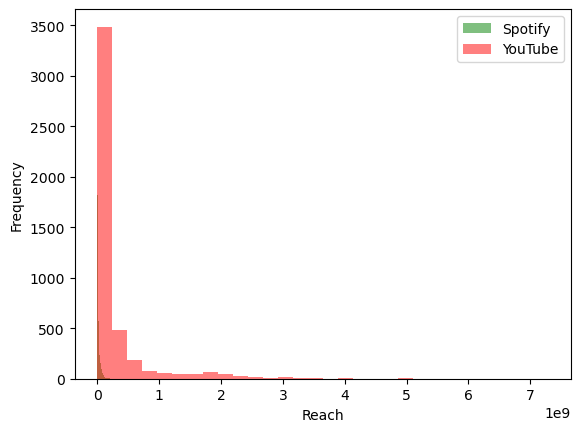

In [243]:
plt.hist(spotify_reach,alpha = 0.5,label = "Spotify",color = "green",bins=30)
plt.hist(youtube_reach,alpha = 0.5,label = "YouTube",color = "red",bins=30)
plt.xlabel("Reach")
plt.ylabel("Frequency")
plt.legend()
plt.show()

lets make a kde plot to visualize further

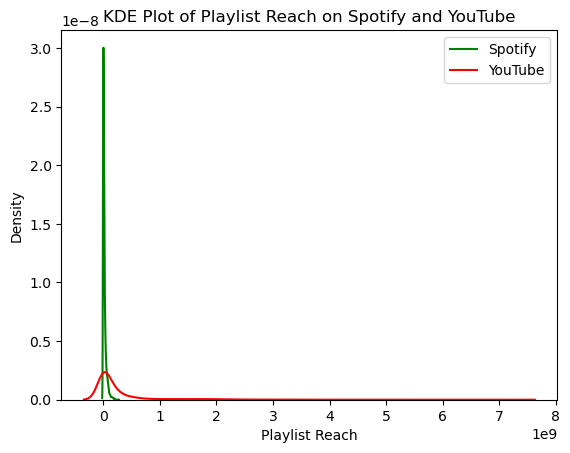

In [246]:
sns.kdeplot(spotify_reach, label="Spotify", color="green")
sns.kdeplot(youtube_reach, label="YouTube", color="red")

plt.title('KDE Plot of Playlist Reach on Spotify and YouTube')
plt.xlabel('Playlist Reach')
plt.ylabel('Density')
plt.legend()
plt.show()